## Explorign Mass Spectroscopy Deconvolution Data

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import numpy as np
import pandas as pd
import re

from NUDT7_ratios import read_grouped_csv
from NUDT7_ratios import remove_dataset_by_filename_content
#from NUDT7_ratios import check_signal_to_noise
from NUDT7_ratios import get_ratios_of_expected_peaks
from NUDT7_ratios import pre_crystal_plot
from NUDT7_ratios import post_crystal_plot
from NUDT7_ratios import string_contains
from NUDT7_ratios import post_crystal_calibrated_plot
from NUDT7_ratios import peak_height_outside_of_interest

from io import StringIO
from scipy.signal import find_peaks

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [5]:
#data_dir = "/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data"
#data_dir = "/home/nelse003/PycharmProjects/mass_spec_ratio/NUDT7_Data"
data_dir = "/hdlocal/enelson/mass_spec_ratio/NUDT7_Data"
df_dict = {}
for csv in os.listdir(data_dir):
    csv = os.path.join(data_dir, csv)
    df_dict.update(read_grouped_csv(csv))

keys_to_remove = []
peak_ratio  = []
for key, df in df_dict.items():
    if "blank" in key:
        keys_to_remove.append(key)

for key in set(keys_to_remove):
    del df_dict[key]

keys_to_remove = []
for key, df in df_dict.items():
    try:
        peak_ratio.append(peak_height_outside_of_interest(df))
    except ValueError:
        keys_to_remove.append(key)
    

/hdlocal/enelson/mass_spec_ratio/NUDT7_ratios.py:57: FutureWarning: split() requires a non-empty pattern match.
  split_data = header_re.split(data)


IsADirectoryError: [Errno 21] Is a directory: '/hdlocal/enelson/mass_spec_ratio/NUDT7_Data/NUDT7A_Post_diffraction_crystal_mass_spectra_apr_14_16_2019'

In [ ]:
print(df_dict.keys())

In [ ]:
sample_key = '190301 : "+ESI Scan (rt: 7.203-7.997 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074435_F5a.d  Deconvoluted (Isotope Width=0.0)"\n'

print(df_dict[sample_key])

In [ ]:
sample_df = df_dict[sample_key]

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line')

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(25000,25800),ylim=(0,60000))

In [ ]:
unlabelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25100) & (sample_df['X(Daltons)'] <= 25300)]

In [ ]:
unlabelled_peak_df['Y(Counts)'].sum()

In [ ]:
labelled_peak_df = sample_df[(sample_df['X(Daltons)'] >= 25454) & (sample_df['X(Daltons)'] <= 25654)]

In [ ]:
labelled_peak_df['Y(Counts)'].sum()

In [ ]:
labelled_peak_df['Y(Counts)'].sum()/unlabelled_peak_df['Y(Counts)'].sum()

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,26000))

Expected peaks are to seperated by 354. Lokking for pairs

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(24000,25000),ylim=(0,22000))

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24200) & (sample_df['X(Daltons)'] <= 24400)]

In [ ]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Therefore the maximum should be at 24,572 for that to be a peak

In [ ]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24500) & (sample_df['X(Daltons)'] <= 24700)]

In [ ]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 24000) & (sample_df['X(Daltons)'] <= 24100)]

In [ ]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

In [ ]:
test_label_df = sample_df[(sample_df['X(Daltons)'] >= 24400) & (sample_df['X(Daltons)'] <= 24500)]

In [ ]:
test_label_df.loc[test_label_df['Y(Counts)'].idxmax()]

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22500,24000),ylim=(0,250000))

Looks like two sets of peaks

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(23500,24000),ylim=(0,120000))

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23500) & (sample_df['X(Daltons)'] <= 23700)]

In [ ]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23850) & (sample_df['X(Daltons)'] <= 23950)]

In [ ]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22700,23300),ylim=(0,250000))

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22750) & (sample_df['X(Daltons)'] <= 22900)]

In [ ]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 23100) & (sample_df['X(Daltons)'] <= 23300)]

In [ ]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line', xlim=(22000,22700),ylim=(0,60000))

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 22600) & (sample_df['X(Daltons)'] <= 22700)]

In [ ]:
test_df.loc[test_df['Y(Counts)'].idxmax()]

Therefore we have:

| Unlabelled | Labelled |
| --- | --- |
| 25125 | 25479 |
| 24218 | 24574 |
| 23525 | 23879 |
| 22786 | 23140 | 

Peak at 22637 doesnt match next peak down. Could be two weak pairs? Explain 8/9 strongest peaks. Need to look at the continuty of ratios between the sets, and the difference using max peak, and area within defined region from

In [ ]:
sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,250000),xlim=(22000,26000))

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 21000) & (sample_df['X(Daltons)'] <= 26000)]


In [ ]:
x = sample_df['Y(Counts)']

In [ ]:
test_df

In [ ]:
peaks, _ = find_peaks(x, height=0)

In [ ]:
peaks = peaks + 6000

In [ ]:
len(peaks)

In [ ]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [ ]:
peaks, _ = find_peaks(x, height=1000)
peaks = peaks + 6000
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
len(peaks)

We recover 6 of the 8 expected peaks in the largest set. Lets check by separation if we can ignore the adducts ,a nd increase to include all

| Unlabelled | Labelled |
| --- | --- |
| 25125 | 25479 |
| 24218 | 24574 |
| 23525 | 23879 |
| 22786 | 23140 | 

In [ ]:
peaks, _ = find_peaks(x, height=1000, distance=100)
peaks = peaks + 6000
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()
len(peaks)

In [ ]:
test_df = sample_df[(sample_df['X(Daltons)'] >= 25125-50) & (sample_df['X(Daltons)'] <= 25125+100)]

In [ ]:
test_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,60000))

In [ ]:
unlabelled_peak_area = test_df['Y(Counts)'].sum()

In [ ]:
labelled_df = sample_df[(sample_df['X(Daltons)'] >= 25479-50) & (sample_df['X(Daltons)'] <= 25479+100)]

In [ ]:
labelled_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,60000))

In [ ]:
labelled_peak_area = labelled_df['Y(Counts)'].sum()

In [ ]:
unlabelled_peak_area/ (unlabelled_peak_area + labelled_peak_area)

In [ ]:
labelled_peak_area/ (unlabelled_peak_area + labelled_peak_area)

In [ ]:
labelled_peak_height = labelled_df['Y(Counts)'].max()

In [ ]:
unlabelled_df = test_df
unlabelled_peak_height = unlabelled_df['Y(Counts)'].max()

In [ ]:
labelled_peak_height/(unlabelled_peak_height + labelled_peak_height)

In [ ]:
unlabelled_peak_height/(unlabelled_peak_height + labelled_peak_height)

In [ ]:
def peak_height_outside_of_interest(df, min_interest = 22000, max_interest = 26000):
    """ Find ratio between largest peak inside area of interst, and outside """
    
    peaks, _ = find_peaks(df['Y(Counts)'], height=1000, distance=100)
    
    peaks_df = df.loc[peaks]
    
    interest_peaks_df = peaks_df[(peaks_df['X(Daltons)'] >= min_interest) & (peaks_df['X(Daltons)'] <= max_interest)]
    uninterest_peaks_df = peaks_df[(peaks_df['X(Daltons)'] < min_interest) | (peaks_df['X(Daltons)'] > max_interest)]
    
    max_uninterest_peak = uninterest_peaks_df.nlargest(1,'Y(Counts)')
    max_interest_peak = interest_peaks_df.nlargest(1,'Y(Counts)')
    
    ratio_of_peak_outside_area = max_uninterest_peak['Y(Counts)'].values/(max_interest_peak['Y(Counts)'].values + max_uninterest_peak['Y(Counts)'].values)

    return float(ratio_of_peak_outside_area)

peak_height_outside_of_interest(sample_df)

In [ ]:
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354


In [ ]:
x = sample_df['Y(Counts)']
peaks, _ = find_peaks(x, height=1000, distance=100)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [ ]:
for key, df in df_dict.items():
     if "190227 : \"+ESI Scan (rt: 7.200-7.994 min, 49 scans) Frag=250.0V blank01.d" in key:
            df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',ylim=(0,2000))

In [ ]:
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354

def peak_nearby(df, peak, delta=10, left_range=50, right_range=100):

    peak_df = df[(df['X(Daltons)'] >= peak-delta)
            & (df['X(Daltons)'] <= peak+delta)]
    #print(peak_df)
    peak_loc = peak_df.loc[peak_df['Y(Counts)'].idxmax()]['X(Daltons)']
    peak_height = peak_df['Y(Counts)'].max()
    peak_area_df = sample_df[(sample_df['X(Daltons)'] >= peak-left_range)
            & (sample_df['X(Daltons)'] <= peak+right_range)]
    peak_area = peak_area_df['Y(Counts)'].sum()

    return peak_loc, peak_height, peak_area


x = sample_df['Y(Counts)']
peaks, _ = find_peaks(x, height=1000, distance=100)
peaks_df = df.loc[peaks]

for peak, peak_labelled in zip(expected_unlabelled_peaks, expected_labelled_peaks):

    print(peak, peak_labelled)
    
    peak_loc, peak_height, peak_area = peak_nearby(sample_df, peak, 
                                                   delta=10, 
                                                   left_range=50, 
                                                   right_range=100)
    
    labelled_peak_loc, \
    labelled_peak_height,\
    labelled_peak_area = peak_nearby(df,
                                     peak_labelled, 
                                     delta=10,
                                     left_range=50,right_range=100)

    print(peak_loc,labelled_peak_loc)

    



In [ ]:
    sample_key = '190301 : "+ESI Scan (rt: 7.203-7.997 min, 49 scans)' \
                 ' Frag=250.0V NUDT7A_p026_CI074435_F5a.d' \
                 '  Deconvoluted (Isotope Width=0.0)"\n'

    sample_df = df_dict[sample_key]

sample_df.plot(x='X(Daltons)',y='Y(Counts)',kind='scatter',ylim=(0,50000),xlim=(25400,25600))

Now Looking at plots of ratios. Load in data once:

In [2]:
data_dir = "/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data"
# Parse all csv in folder to separate into individual deconvolutions by headers
df_dict = {}
for csv in os.listdir(data_dir):
    csv = os.path.join(data_dir, csv)
    df_dict.update(read_grouped_csv(csv))

# Remove blank datasets
df_dict = remove_dataset_by_filename_content(df_dict, key_string="blank")
# Remove un-needed dataset
df_dict = remove_dataset_by_filename_content(df_dict,
                                             key_string="NUDT7A_p026_NU0000308a"
                                                        "_post_gel_filtration")

# remove datasets that do not pass signal threshold
# currently 1000 counts in interest area 22000-26000
# TODO Move parameters up to non hard coded region
df_dict, peak_ratios = check_signal_to_noise(df_dict)

# From Exploratory analysis these pairs of peaks are present
# showing that degradation into three sets of paired peaks
expected_unlabelled_peaks = np.array([25125, 24218, 23525, 22786])
expected_labelled_peaks = expected_unlabelled_peaks + 354

# Translate keys (filenames) into ratios
# Split across two dicitionaries to parse
# intended ratio and expected ratio
intended_ratio_dict = ratios_from_filenames(df_dict)

# Process all deconvolutions to ratios of peaks
ratio_df_list = []
for key, df in df_dict.items():
    ratio_df = get_ratios_of_expected_peaks(df,
                                            expected_unlabelled_peaks,
                                            expected_labelled_peaks)

    # Get weights of contributing peaks based on peak height
    height_weight = (ratio_df['peak_height'] + ratio_df['labelled_peak_height']) \
                    / (ratio_df['labelled_peak_height'].sum() + \
                       ratio_df['peak_height'].sum())

    # Get weights of contributing peaks based on peak area
    area_weight = (ratio_df['peak_area'] + ratio_df['labelled_peak_area']) \
                  / (ratio_df['labelled_peak_area'].sum() + \
                     ratio_df['peak_area'].sum())

    # Get a single weighted ratio using peak heights
    weighted_height_ratio = height_weight * ratio_df['height_ratio']
    weighted_height_ratio = weighted_height_ratio.sum()

    # Get a single weighted ratio using peak areas
    weighted_area_ratio = area_weight * ratio_df['area_ratio']
    weighted_area_ratio = weighted_area_ratio.sum()

    # Store weights and ratios, and key in ratio dataframe
    ratio_df['height_weights'] = height_weight
    ratio_df['area_weights'] = area_weight
    ratio_df['weighted_height_ratio'] = weighted_height_ratio
    ratio_df['weighted_area_ratio'] = weighted_area_ratio
    ratio_df['intended_ratio'] = intended_ratio_dict[key]
    ratio_df['key'] = key

    # For concatenating results
    ratio_df_list.append(ratio_df)

ratio_df = pd.concat(ratio_df_list)

IsADirectoryError: [Errno 21] Is a directory: '/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data/180425_NUDT7A_p016'

Split into two dataframes

In [ ]:
ratio_df['pre_crystal'] = ratio_df['key'].apply(string_contains, match='L_')
pre_crystal_df = ratio_df[ratio_df['pre_crystal'] == True]
post_crystal_df = ratio_df[ratio_df['pre_crystal'] == False]

Plotting

In [ ]:
pre_crystal_plot(pre_crystal_df)
post_crystal_plot(post_crystal_df)

Swapping to Calibrated ratio from pre_crystal experiements. Interpolating the missing value, and setting no peak at 0 intedned ratio

In [ ]:
df = pre_crystal_df[['intended_ratio','weighted_height_ratio']]
df = df.drop_duplicates()
df = df.sort_values(by=['intended_ratio'])
intended_ratio = df['intended_ratio']
expected_ratio = df['weighted_height_ratio']
interp_val = np.interp(0.75, intended_ratio, expected_ratio)

df1 = pd.DataFrame({'intended_ratio': [0.75,0],
           'weighted_height_ratio': [interp_val,0]})
df = df.append(df1)
df = df.sort_values(by=['intended_ratio'])
df = df.rename(columns={'weighted_height_ratio': 'calibrated_ratio'})
post_crystal_df = pd.merge(post_crystal_df, df, on='intended_ratio')

In [ ]:
post_crystal_calibrated_plot(post_crystal_df)

In [ ]:
for key in df_dict.keys():
    if 'CI074433' in key:
        print(key)
    

In [ ]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C5c.d  Deconvoluted (Isotope Width=0.0)"\n'

In [ ]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C5c.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

In [ ]:
key = '190302 : "+ESI Scan (rt: 7.202-7.996 min, 49 scans) Frag=250.0V NUDT7A_p026_CI074433_C3c.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

In [ ]:
key = '190302 : "+ESI Scan (rt: 7.208-7.985 min, 48 scans) Frag=250.0V NUDT7A_p026_CI074433_A6d.d  Deconvoluted (Isotope Width=0.0)"\n'
no_label_df = df_dict[key]
no_label_df.plot(x='X(Daltons)',y='Y(Counts)',kind='line',xlim=(22000,26000))

## Plotting mounted ratios

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

mounted_df = pd.read_csv('/dls/science/groups/i04-1/elliot-dev/mass_spec_ratio/NUDT7_Data/mounted_ratios.csv')

In [ ]:
mounted_df.columns.values

In [ ]:
occ_correct = "/dls/science/groups/i04-1/elliot-dev/Work/NUDT7A_mass_spec_refinements/occ_correct.csv"
occ_correct_df = pd.read_csv(occ_correct)

In [ ]:
occ_correct_df

In [ ]:
occ_df = pd.merge(occ_correct_df, mounted_df, right_on='  Mounted Crystal ID ', left_on='crystal')


In [ ]:
occ_df = occ_df.drop_duplicates()

In [ ]:
occ_df = occ_df[occ_df.state=="bound"]

In [ ]:
occ_df = occ_df[occ_df.resname=="LIG"]

In [ ]:
occ_df.columns.values

In [ ]:
occ_df = occ_df[occ_df['occupancy group']==3]

In [ ]:
occ_df.plot(x='state occupancy', y='Expected Ratio',kind='scatter')

In [ ]:
def xtal_num(row):
    return row.crystal.split('x')[1]

In [ ]:
occ_df['xtal_num'] = occ_df.apply(func=xtal_num,axis=1)

Removed older structures in csv file.

In [ ]:
occ_new = pd.read_csv("/dls/science/groups/i04-1/elliot-dev/Work/NUDT7A_mass_spec_refinements/occ_quick.csv")

In [ ]:
occ_new.plot(x='state occupancy', y='Expected Ratio',kind='scatter')

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_new.plot(x='state occupancy', c='B_mean',kind='scatter',y='Expected Ratio',colormap='viridis', sharex=False)
plt.savefig('occ_B_expected.png')


Looking at the plots for earlier crystals, including all

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='state occupancy', c='B_mean',kind='scatter',y='Expected Ratio',colormap='viridis', sharex=False)
plt.savefig('occ_B_expected.png')

Plotting with intended ratio

In [ ]:
post_crystal_df

In [ ]:
post_crystal_df.plot(x="intended_ratio",y="weighted_area_ratio",kind='scatter')

In [ ]:
from scipy.optimize import curve_fit


def fsigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

def expon(x, a, b):
    return 1 - np.exp(-a*(x-b))

# Sigmoidal fit

popt, pcov = curve_fit(fsigmoid, 
                       ydata = post_crystal_df['intended_ratio'], 
                       xdata = post_crystal_df['calibrated_ratio'], 
                       method='dogbox')

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = fsigmoid(x, *popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

# Exponential fit

exp_popt, exp_pcov = curve_fit(expon, 
                       ydata = post_crystal_df['intended_ratio'], 
                       xdata = post_crystal_df['calibrated_ratio'], 
                       method='dogbox')

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = expon(x, *exp_popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

# exponential fit forcing end points

sigma = np.ones(len(post_crystal_df['intended_ratio']))
sigma[[0, -1]] = 0.01

popt, pcov = curve_fit(expon, 
                       ydata = sorted(post_crystal_df['intended_ratio']), 
                       xdata = sorted(post_crystal_df['calibrated_ratio']), 
                       method='dogbox',
                       sigma=sigma)

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = expon(x, *popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

# sigmoid fit forcing end points

sigma = np.ones(len(post_crystal_df['intended_ratio']))
sigma[[0, -1]] = 0.01

popt, pcov = curve_fit(fsigmoid, 
                       ydata = sorted(post_crystal_df['intended_ratio']), 
                       xdata = sorted(post_crystal_df['calibrated_ratio']), 
                       method='dogbox',
                       sigma=sigma)

plt.plot(post_crystal_df['calibrated_ratio'], post_crystal_df['intended_ratio'], 'o', label='data')
x = np.linspace(0, 1, 100)
y = fsigmoid(x, *popt)
plt.plot(x,y,label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.xlabel("intended ratio")
plt.ylabel("calibrated_ratio")
plt.show()

In [ ]:
x

In [ ]:
expon(0, *popt)

In [ ]:
expon(0.1,*exp_popt)

In [ ]:
occ_new['Calibrated_exp_curve_fit_ratio'] = expon(occ_new['Expected Ratio'], *exp_popt)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_new.plot(x='state occupancy', c='B_mean',kind='scatter',y='Calibrated_exp_curve_fit_ratio',colormap='viridis', sharex=False)
plt.savefig('occ_B_expected_calibrated.png')

## Plotting mounted ratios, from / copy_atoms

This should be independent, after sourcing in cell 2

In [170]:
occ_correct = "occ_correct.csv"
occ_correct_df = pd.read_csv(occ_correct)
mounted_df = pd.read_csv('mounted_ratios.csv')


occ_df = pd.merge(occ_correct_df, mounted_df, right_on='  Mounted Crystal ID ', left_on='crystal')
occ_df = occ_df[occ_df.state=="bound"]
occ_df = occ_df[occ_df.resname=="LIG"]
occ_df = occ_df[occ_df['occupancy group']==5]

Plotting with colour map

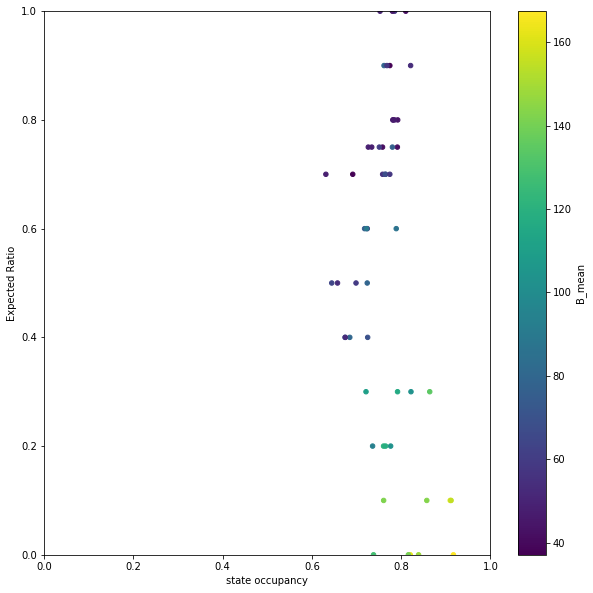

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='state occupancy', c='B_mean',kind='scatter',y='Expected Ratio',colormap='viridis', sharex=False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('copy_atoms_occ_B_expected.png')

/home/nelse003/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)
/home/nelse003/.local/lib/python3.6/site-packages/matplotlib/legend.py:623: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fec56ac0dd8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


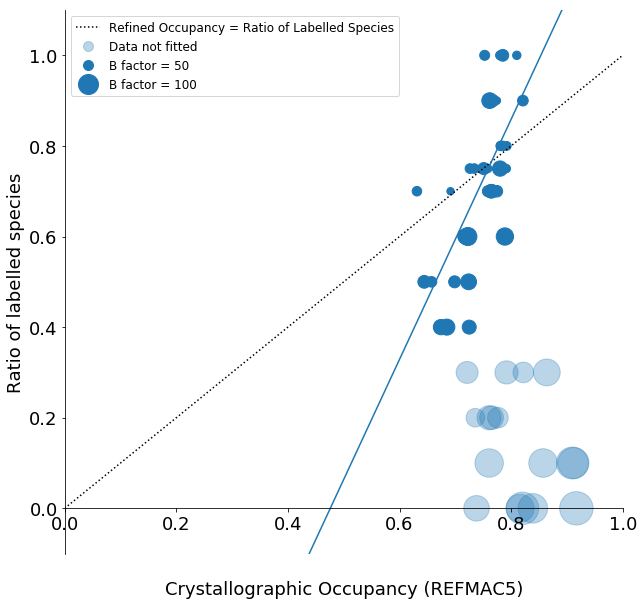

In [4]:
import statsmodels.api as sm
import matplotlib.lines as mlines
plt.rcParams.update({'font.size': 18})

def plot_ratio_occupancy(occ_df, xlabel, f_name, occ_column_name, b_col_name="B_mean", min_cond=0.4):

    x = occ_df[occ_column_name]
    y = occ_df['Expected Ratio']
    marker_area = (occ_df[b_col_name]/5)**2

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_label_coords(0.5,-0.05)

    plt.xlim(0,1.0)
    plt.ylim(-0.1,1.1)
    plt.xlabel(xlabel)
    plt.ylabel("Ratio of labelled species")

    xline = np.linspace(0,1,100)
    yline = xline
    line_1, = ax.plot(xline,yline,'k:')

    cond = (y<=1.0) & (y>=min_cond)
    xFit = x[cond]
    yFit = y[cond]
    marker_area_fit = marker_area[cond]
    marker_area_other = marker_area[~cond]

    scatter_1 = ax.scatter(xFit,yFit,s=marker_area_fit)
    scatter_2 = ax.scatter(x[~cond], y[~cond], marker_area_other, color='C0', alpha=0.3)

    # https://stackoverflow.com/questions/47074423/how-to-get-default-blue-colour-of-matplotlib-pyplot-scatter
    # https://matplotlib.org/users/dflt_style_changes.html#colors-color-cycles-and-color-maps

    blue_circ = mlines.Line2D([], [], color='C0', marker='o', linestyle='None',
                              markersize=10)
    blue_circ_2 = mlines.Line2D([], [], color='C0', marker='o', linestyle='None',
                              markersize=20)

    trans_blue_circ = mlines.Line2D([], [], color='C0', marker='o', linestyle='None',
                              markersize=10, alpha =.3)

    fit = sm.OLS(yFit, sm.add_constant(xFit)).fit()

    line_2 = plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100)*fit.params[1] +fit.params[0])

    legend  = plt.legend((line_1, trans_blue_circ, line_2, blue_circ, blue_circ_2),
               ("Refined Occupancy = Ratio of Labelled Species",
                "Data not fitted",
                "Fit to ratio >= {}\n {:.2f}x{:+.2f}. \n R-squared {:.3f}".format(
                    min_cond,
                fit.params[1],fit.params[0],fit.rsquared),
                "B factor = 50",
                "B factor = 100"), prop={'size': 12})

    plt.savefig(f_name, dpi=600)

occ_correct = "occ_correct.csv"
occ_correct_df = pd.read_csv(occ_correct)
mounted_df = pd.read_csv('mounted_ratios.csv')


occ_df = pd.merge(occ_correct_df, mounted_df, right_on='  Mounted Crystal ID ', left_on='crystal')
occ_df = occ_df[occ_df.state=="bound"]
occ_df = occ_df[occ_df.resname=="LIG"]
occ_df = occ_df[occ_df['occupancy group']==5]    

plot_ratio_occupancy(occ_df=occ_df, 
                     f_name="Occupancy_B_factor_refmac_5.png",
                     xlabel="Crystallographic Occupancy (REFMAC5)",
                    occ_column_name="state occupancy")

In [ ]:
occ_df['Calibrated_exp_curve_fit_ratio'] = expon(occ_df['Expected Ratio'], *exp_popt)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='state occupancy', c='B_mean',kind='scatter',y='Calibrated_exp_curve_fit_ratio',colormap='viridis', sharex=False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('copy_atoms_occ_B_calibrated.png')

In [ ]:
occ_df

## Plotting Exhaustive search occupancy

/hdlocal/enelson/envs/mass_spec_ratio/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


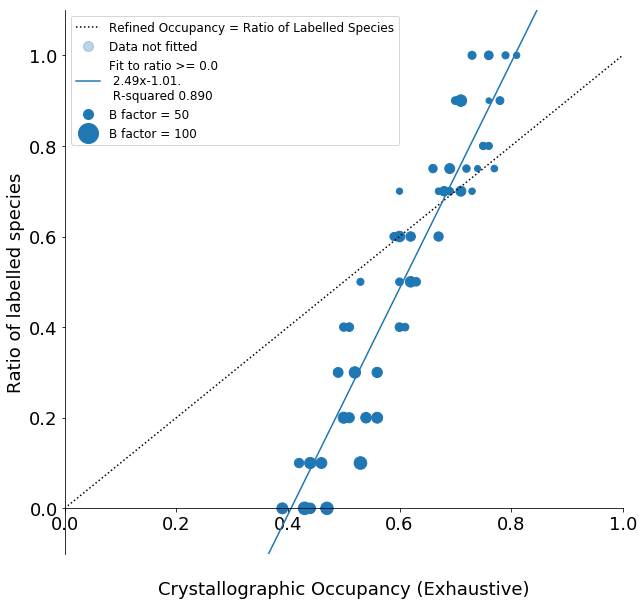

In [193]:
minima_csv = "exhaustive_minima.csv"

minima_df = pd.read_csv(minima_csv)
occ_df = pd.merge(minima_df, mounted_df, right_on='  Mounted Crystal ID ', left_on='crystal')

plot_ratio_occupancy(occ_df=occ_df, 
                     f_name="Occupancy_B_factor_exhaustive.png",
                     xlabel="Crystallographic Occupancy (Exhaustive)",
                    occ_column_name="occupancy",
                    b_col_name="b_factor",
                    min_cond=0.0)

In [179]:
occ_df

,crystal,occupancy,b_factor,fo_fc,Mounted Crystal ID,Crystal to be Mounted,Expected Ratio
0,NUDT7A-x2160,0.60,31.582734,0.138629,NUDT7A-x2160,CI074434-E02a,0.70
1,NUDT7A-x2161,0.73,32.372302,0.098197,NUDT7A-x2161,CI074434-E02a,0.70
2,NUDT7A-x2162,0.43,63.165468,0.064282,NUDT7A-x2162,CI074433-A08c,0.00
3,NUDT7A-x2177,0.77,33.161871,0.074816,NUDT7A-x2177,CI074437-G07c,0.75
4,NUDT7A-x2175,0.74,30.793166,0.087589,NUDT7A-x2175,CI074437-G07c,0.75
5,NUDT7A-x2185,0.44,50.532375,0.085231,NUDT7A-x2185,CI074433-C09a,0.00
6,NUDT7A-x2186,0.47,62.375900,0.068015,NUDT7A-x2186,CI074433-C10a,0.00
7,NUDT7A-x2187,0.39,54.480216,0.076403,NUDT7A-x2187,CI074433-C11c,0.00
8,NUDT7A-x2188,0.44,56.059353,0.075125,NUDT7A-x2188,CI074433-E10c,0.10
9,NUDT7A-x2189,0.53,63.165468,0.076719,NUDT7A-x2189,CI074433-F03a,0.10


In [175]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='occupancy', c='b_factor',kind='scatter',y='Calibrated_exp_curve_fit_ratio',colormap='viridis', sharex=False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('exhaustive_occ_B_calibrated.png')

KeyError: 'Calibrated_exp_curve_fit_ratio'

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
occ_df.plot(x='occupancy', c='b_factor',kind='scatter',y='Expected Ratio',colormap='viridis', sharex=False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('exhaustive_occ_B.png')